In [1]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
# import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
from sklearn import datasets
import seaborn as sn
import statsmodels.api as sm
# from numpy import NaN
from config import api_key
# import scipy.stats as stats

In [2]:
# import csv files
csvfile = "./Resources/2019.csv"
csv_df = pd.read_csv(csvfile)
csv_df["Year"] = "2019"

csvfile18 = "./Resources/2018.csv"
csv_df18 = pd.read_csv(csvfile18)
csv_df18["Year"] = "2018"

csvfile17 = "./Resources/2017.csv"
csv_df17 = pd.read_csv(csvfile17)
csv_df17["Year"] = "2017"

csvfile16 = "./Resources/2016.csv"
csv_df16 = pd.read_csv(csvfile16)
csv_df16["Year"] = "2016"

csvfile15 = "./Resources/2015.csv"
csv_df15 = pd.read_csv(csvfile15)
csv_df15["Year"] = "2015"

In [3]:
#merged indiv file years 2015-2019 together

combined_df = csv_df.append(csv_df18)
combined_df = combined_df.append(csv_df17)
combined_df = combined_df.append(csv_df16)
combined_df = combined_df.append(csv_df15)

#drop index column that was created when files were merged
combined_df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
#import csv from api data

playercsv = "./Resources/player_data.csv"
player_df = pd.read_csv(playercsv)
merged_df = pd.merge(combined_df, player_df, left_on = "Player", right_on = "Name", how="left")
merged_df.drop(columns=["G", "GS", "Att", "Yds", "Att.1", "Yds.1", "Yds.2", "Name", "Salary"], inplace=True)
merged_df.drop("Unnamed: 0", axis=1, inplace=True)
merged_df.rename(columns={
    "Tm": "Team",
    "Cmp": "Completions",
    "Int": "Interceptions",
    "Tgt": "Targets",
    "Y/R": "YdsPerRec",
    "Rec": "Receptions",
    "Year": "FantasyYear"
}, inplace=True)

In [5]:
sorted_df = merged_df.sort_values("FantasyPoints", ascending = False)

indexPositions = sorted_df[sorted_df["Position"] == "0"].index
sorted_df.drop(indexPositions , inplace=True)

In [6]:
#combine height in feet with height in inches to create total height in inches

sorted_df["Height_ft_in"] = sorted_df["HeightFeet"] * 12
sorted_df["Height_Total"] = sorted_df["Height_ft_in"] + sorted_df["HeightInches"]

In [7]:
x = sorted_df["Age"]
y = sorted_df["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.442
Model:                            OLS   Adj. R-squared (uncentered):              0.442
Method:                 Least Squares   F-statistic:                              2403.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                        0.00
Time:                        20:33:24   Log-Likelihood:                         -17747.
No. Observations:                3031   AIC:                                  3.550e+04
Df Residuals:                    3030   BIC:                                  3.550e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            2.8547      0.058     49.020      0.000       2.741       2.969
==============================================================================
Omnibus:                      613.495   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.797
Skew:                           1.321   Prob(JB):                    4.47e-231
Kurtosis:                       4.193   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
x = sorted_df["Weight"]
y = sorted_df["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.441
Model:                            OLS   Adj. R-squared (uncentered):              0.441
Method:                 Least Squares   F-statistic:                              1700.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                   1.52e-274
Time:                        20:33:24   Log-Likelihood:                         -12808.
No. Observations:                2158   AIC:                                  2.562e+04
Df Residuals:                    2157   BIC:                                  2.562e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.3660      0.009     41.233      0.000       0.349       0.383
==============================================================================
Omnibus:                      322.065   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.995
Skew:                           1.125   Prob(JB):                    1.60e-104
Kurtosis:                       3.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
x = sorted_df["Height_Total"]
y = sorted_df["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.456
Method:                 Least Squares   F-statistic:                              1813.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                   4.18e-288
Time:                        20:33:24   Log-Likelihood:                         -12777.
No. Observations:                2158   AIC:                                  2.556e+04
Df Residuals:                    2157   BIC:                                  2.556e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     1.1247      0.026     42.584      0.000       1.073       1.176
==============================================================================
Omnibus:                      341.645   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.300
Skew:                           1.163   Prob(JB):                    2.84e-113
Kurtosis:                       3.591   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
positionPoints_df = sorted_df.groupby("Position")["FantasyPoints"].mean()

In [11]:
qb_data = sorted_df.loc[sorted_df["Position"] == "QB"]

In [12]:
x = qb_data["Age"]
y = qb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.569
Model:                            OLS   Adj. R-squared (uncentered):              0.568
Method:                 Least Squares   F-statistic:                              378.1
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    2.97e-54
Time:                        20:33:24   Log-Likelihood:                         -1776.6
No. Observations:                 287   AIC:                                      3555.
Df Residuals:                     286   BIC:                                      3559.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            4.7379      0.244     19.446      0.000       4.258       5.218
==============================================================================
Omnibus:                      166.665   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.215
Skew:                           0.314   Prob(JB):                     1.50e-05
Kurtosis:                       1.790   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
x = qb_data["Weight"]
y = qb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.558
Model:                            OLS   Adj. R-squared (uncentered):              0.557
Method:                 Least Squares   F-statistic:                              361.5
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    1.13e-52
Time:                        20:33:24   Log-Likelihood:                         -1780.2
No. Observations:                 287   AIC:                                      3562.
Df Residuals:                     286   BIC:                                      3566.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.6018      0.032     19.013      0.000       0.540       0.664
==============================================================================
Omnibus:                      608.823   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.527
Skew:                           0.303   Prob(JB):                     1.74e-06
Kurtosis:                       1.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
x = qb_data["Height_Total"]
y = qb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.558
Model:                            OLS   Adj. R-squared (uncentered):              0.556
Method:                 Least Squares   F-statistic:                              361.0
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    1.27e-52
Time:                        20:33:24   Log-Likelihood:                         -1780.4
No. Observations:                 287   AIC:                                      3563.
Df Residuals:                     286   BIC:                                      3566.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     1.7861      0.094     18.999      0.000       1.601       1.971
==============================================================================
Omnibus:                      538.371   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.422
Skew:                           0.310   Prob(JB):                     1.83e-06
Kurtosis:                       1.649   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
rb_data = sorted_df.loc[sorted_df["Position"] == "RB"]

In [16]:
x = rb_data["Age"]
y = rb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.503
Model:                            OLS   Adj. R-squared (uncentered):              0.502
Method:                 Least Squares   F-statistic:                              494.1
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    3.58e-76
Time:                        20:33:24   Log-Likelihood:                         -2885.3
No. Observations:                 490   AIC:                                      5773.
Df Residuals:                     489   BIC:                                      5777.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            3.5111      0.158     22.228      0.000       3.201       3.821
==============================================================================
Omnibus:                       90.491   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.662
Skew:                           1.165   Prob(JB):                     1.05e-31
Kurtosis:                       4.250   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x = rb_data["Weight"]
y = rb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.518
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              524.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    1.88e-79
Time:                        20:33:24   Log-Likelihood:                         -2877.8
No. Observations:                 490   AIC:                                      5758.
Df Residuals:                     489   BIC:                                      5762.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.4171      0.018     22.910      0.000       0.381       0.453
==============================================================================
Omnibus:                       86.078   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.564
Skew:                           1.137   Prob(JB):                     2.70e-29
Kurtosis:                       4.128   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x = rb_data["Height_Total"]
y = rb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.512
Model:                            OLS   Adj. R-squared (uncentered):              0.511
Method:                 Least Squares   F-statistic:                              514.0
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    2.61e-78
Time:                        20:33:24   Log-Likelihood:                         -2880.4
No. Observations:                 490   AIC:                                      5763.
Df Residuals:                     489   BIC:                                      5767.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     1.2533      0.055     22.672      0.000       1.145       1.362
==============================================================================
Omnibus:                       85.214   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.313
Skew:                           1.133   Prob(JB):                     8.32e-29
Kurtosis:                       4.093   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
wr_data = sorted_df.loc[sorted_df["Position"] == "WR"]

In [20]:
x = wr_data["Age"]
y = wr_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.523
Method:                 Least Squares   F-statistic:                              836.2
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                   1.23e-124
Time:                        20:33:24   Log-Likelihood:                         -4450.8
No. Observations:                 762   AIC:                                      8904.
Df Residuals:                     761   BIC:                                      8908.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            3.4436      0.119     28.917      0.000       3.210       3.677
==============================================================================
Omnibus:                       87.891   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.037
Skew:                           0.962   Prob(JB):                     2.34e-26
Kurtosis:                       3.125   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
x = wr_data["Weight"]
y = wr_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.511
Model:                            OLS   Adj. R-squared (uncentered):              0.510
Method:                 Least Squares   F-statistic:                              794.5
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                   2.92e-120
Time:                        20:33:24   Log-Likelihood:                         -4460.8
No. Observations:                 762   AIC:                                      8924.
Df Residuals:                     761   BIC:                                      8928.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.4289      0.015     28.187      0.000       0.399       0.459
==============================================================================
Omnibus:                       83.948   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.657
Skew:                           0.938   Prob(JB):                     5.67e-25
Kurtosis:                       3.031   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
x = wr_data["Height_Total"]
y = wr_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.508
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              786.3
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                   2.18e-119
Time:                        20:33:24   Log-Likelihood:                         -4462.8
No. Observations:                 762   AIC:                                      8928.
Df Residuals:                     761   BIC:                                      8932.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     1.1838      0.042     28.041      0.000       1.101       1.267
==============================================================================
Omnibus:                       86.546   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.021
Skew:                           0.955   Prob(JB):                     6.40e-26
Kurtosis:                       3.065   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
te_data = sorted_df.loc[sorted_df["Position"] == "TE"]

In [24]:
x = te_data["Age"]
y = te_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.443
Method:                 Least Squares   F-statistic:                              387.6
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    7.47e-64
Time:                        20:33:24   Log-Likelihood:                         -2693.2
No. Observations:                 486   AIC:                                      5388.
Df Residuals:                     485   BIC:                                      5393.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            2.1183      0.108     19.689      0.000       1.907       2.330
==============================================================================
Omnibus:                      169.975   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.877
Skew:                           1.724   Prob(JB):                    9.28e-103
Kurtosis:                       6.363   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x = te_data["Weight"]
y = te_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.424
Model:                            OLS   Adj. R-squared (uncentered):              0.423
Method:                 Least Squares   F-statistic:                              356.6
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    4.95e-60
Time:                        20:33:24   Log-Likelihood:                         -2702.0
No. Observations:                 486   AIC:                                      5406.
Df Residuals:                     485   BIC:                                      5410.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.2137      0.011     18.885      0.000       0.191       0.236
==============================================================================
Omnibus:                      168.578   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.651
Skew:                           1.717   Prob(JB):                    1.54e-100
Kurtosis:                       6.303   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
x = te_data["Height_Total"]
y = te_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.423
Model:                            OLS   Adj. R-squared (uncentered):              0.422
Method:                 Least Squares   F-statistic:                              355.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    6.06e-60
Time:                        20:33:24   Log-Likelihood:                         -2702.2
No. Observations:                 486   AIC:                                      5406.
Df Residuals:                     485   BIC:                                      5411.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     0.7035      0.037     18.866      0.000       0.630       0.777
==============================================================================
Omnibus:                      167.567   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.978
Skew:                           1.713   Prob(JB):                     1.18e-98
Kurtosis:                       6.245   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
top60 = sorted_df.head(60)
corr_df = top60[["Position", "Age", "Weight", "Height_Total", "FantasyPoints"]]

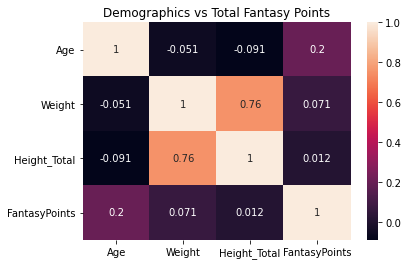

In [28]:
corrMatrix = sorted_df[["Age", "Weight", "Height_Total", "FantasyPoints"]].loc[sorted_df["Position"] == "WR"].corr()
sn.heatmap(corrMatrix, annot=True).set_title("Demographics vs Total Fantasy Points")
plt.show()

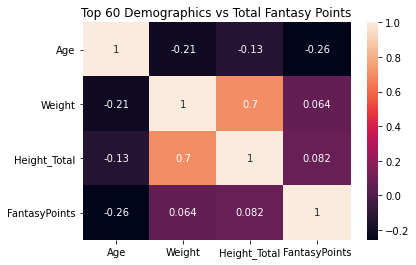

In [29]:
corrMatrix = top60[["Age", "Weight", "Height_Total", "FantasyPoints"]].loc[sorted_df["Position"] == "QB"].corr()
sn.heatmap(corrMatrix, annot=True).set_title("Top 60 Demographics vs Total Fantasy Points")
plt.show()

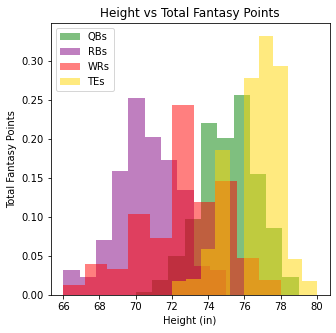

In [30]:
qb_heights = qb_data["Height_Total"]
rb_heights = rb_data["Height_Total"]
wr_heights = wr_data["Height_Total"]
te_heights = te_data["Height_Total"]

plt.figure(figsize=(5,5))
plt.title("Height vs Total Fantasy Points")
plt.xlabel("Height (in)")
plt.ylabel("Total Fantasy Points")
plt.hist(qb_heights, density=True, alpha = 0.5, color="green", label="QBs")
plt.hist(rb_heights, density=True, alpha = 0.5,  color="purple", label="RBs")
plt.hist(wr_heights, density=True, alpha = 0.5, color="red", label="WRs")
plt.hist(te_heights, density=True, alpha = 0.5, color="gold", label="TEs")
plt.legend()

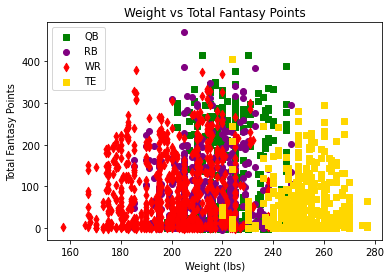

In [31]:
x = range(150,350)
y = range(0,400)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(qb_data["Weight"], qb_data["FantasyPoints"], c = "green", marker="s", label="QB")
ax1.scatter(rb_data["Weight"],rb_data["FantasyPoints"], c = "purple", marker="o", label="RB")
ax1.scatter(wr_data["Weight"], wr_data["FantasyPoints"], c = "red", marker="d", label="WR")
ax1.scatter(te_data["Weight"],te_data["FantasyPoints"], c = "gold", marker="s", label="TE")

plt.legend(loc='upper left');
plt.title("Weight vs Total Fantasy Points")
plt.xlabel("Weight (lbs)")
plt.ylabel("Total Fantasy Points")
plt.show()

In [32]:
qb_age = qb_data["Age"]
rb_age = rb_data["Age"]
wr_age = wr_data["Age"]
te_age = te_data["Age"]

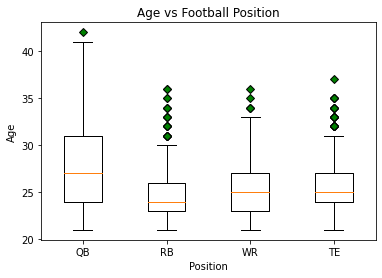

In [33]:
green_diamond = dict(markerfacecolor='g', marker='D')
plots = [qb_age, rb_age, wr_age, te_age]
labels = ["QB", "RB", "WR", "TE"]
fig1, ax1 = plt.subplots()
ax1.set_title("Age vs Football Position")
ax1.set_ylabel("Age")
ax1.set_xlabel("Position")
ax1.boxplot(plots, labels=labels, flierprops=green_diamond)
plt.show()
                                                                             

In [34]:
qb_group = top60.loc[top60["Position"] == "QB"]
rb_group = top60.loc[top60["Position"] == "RB"]
wr_group = top60.loc[top60["Position"] == "WR"]
te_group = top60.loc[top60["Position"] == "TE"]

In [35]:
qb_age_group = qb_group["Age"]
rb_age_group = rb_group["Age"]
wr_age_group = wr_group["Age"]
te_age_group = te_group["Age"]

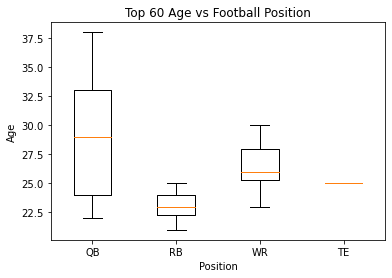

In [36]:
green_diamond = dict(markerfacecolor='g', marker='D')
plots = [qb_age_group, rb_age_group, wr_age_group, te_age_group]
labels = ["QB", "RB", "WR", "TE"]
fig1, ax1 = plt.subplots()
ax1.set_title("Top 60 Age vs Football Position")
ax1.set_ylabel("Age")
ax1.set_xlabel("Position")
ax1.boxplot(plots, labels=labels, flierprops=green_diamond)
plt.show()

In [37]:
bins = [0,5,10,15,20,25]
group_names = ['0-5 yrs', '5-10 yrs', '10-15 yrs', '15-20 yrs', '20-25 yrs']
merged_df["Exper_Bins"] = pd.cut(merged_df["Experience"], bins, labels=group_names, include_lowest=True)

In [38]:
qb_data = merged_df.loc[merged_df['Pos']=='QB']
rb_data = merged_df.loc[merged_df['Pos']=='RB']
wr_data = merged_df.loc[merged_df['Pos']=='WR']
te_data = merged_df.loc[merged_df['Pos']=='TE']

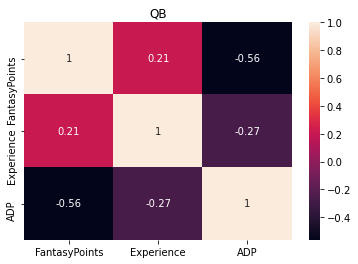

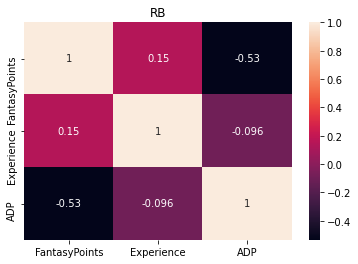

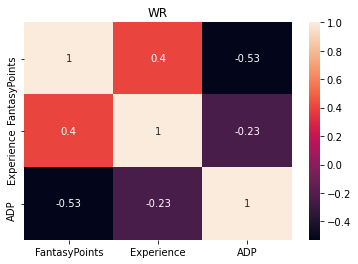

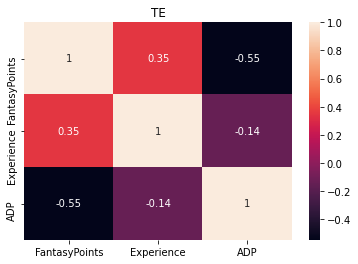

In [39]:
corrMatrix = qb_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("QB")
plt.savefig('./Images/CorrMat_QB.png')
plt.show()

corrMatrix = rb_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("RB")
plt.savefig('./Images/CorrMat_RB.png')
plt.show()

corrMatrix = wr_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("WR")
plt.savefig('./Images/CorrMat_WR.png')
plt.show()

corrMatrix = te_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("TE")
plt.savefig('./Images/CorrMat_TE.png')
plt.show()


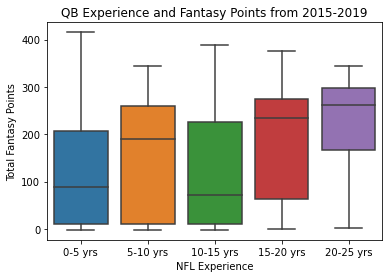

The p value from the ANOVA test comparing Experience to Fantasy Points for the quarter back position is 0.0015238308466153973.
This tells us there is not a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,252.000000,252.000000,252.000000
mean,10.781746,446.082540,142.022460
std,5.394772,342.453867,120.715284
min,3.000000,16.400000,-2.300000
25%,7.000000,145.800000,16.210000
50%,10.000000,485.200000,132.960000
75%,14.250000,611.375000,256.605000
max,24.000000,1808.800000,415.680000


In [40]:
qb = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=qb_data.dropna()).set_title('QB Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_QB.png')
plt.show()
group1 = qb_data[qb_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = qb_data[qb_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = qb_data[qb_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = qb_data[qb_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
group5 = qb_data[qb_data["Exper_Bins"] == "20-25 yrs"]["FantasyPoints"].dropna()
qb = sts.f_oneway(group1, group2, group3, group4, group5)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the quarter back position is {qb[1]}.')
print(f'This tells us there is not a relationship between Experience and Fantasy Points.')
qb_data[['Experience','ADP','FantasyPoints']].dropna().describe()

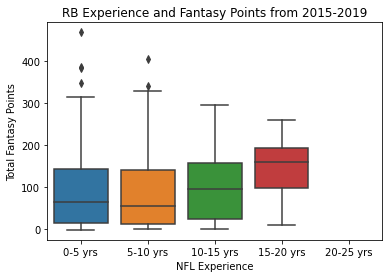

The p value from the ANOVA test comparing Experience to Fantasy Points for the running back position is 0.14530633668951118.
This tells us there could be a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,421.000000,421.000000,421.000000
mean,7.211401,428.957007,90.745653
std,3.054343,395.384999,88.167095
min,1.000000,1.700000,-2.000000
25%,5.000000,157.600000,14.100000
50%,7.000000,304.000000,68.400000
75%,9.000000,589.600000,145.200000
max,18.000000,2019.900000,469.200000


In [41]:
rb = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=rb_data.dropna()).set_title('RB Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_RB.png')
plt.show()
group1 = rb_data[rb_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = rb_data[rb_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = rb_data[rb_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = rb_data[rb_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
rb = sts.f_oneway(group1, group2, group3, group4)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the running back position is {rb[1]}.')
print(f'This tells us there could be a relationship between Experience and Fantasy Points.')
rb_data[['Experience','ADP','FantasyPoints']].dropna().describe()

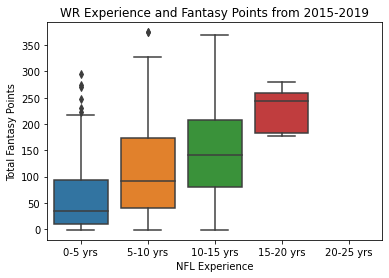

The p value from the ANOVA test comparing Experience to Fantasy Points for the wide receiver position is 1.016888960141898e-24.
This tells us there is not a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,588.000000,588.000000,588.000000
mean,7.399660,476.594728,98.109116
std,3.104396,428.235265,86.170850
min,1.000000,10.100000,-1.500000
25%,5.000000,151.275000,23.425000
50%,8.000000,315.400000,71.650000
75%,9.000000,816.700000,157.175000
max,19.000000,2011.800000,374.600000


In [42]:
wr = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=wr_data.dropna()).set_title('WR Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_WR.png')
plt.show()
group1 = wr_data[wr_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = wr_data[wr_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = wr_data[wr_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = wr_data[wr_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
wr = sts.f_oneway(group1, group2, group3, group4)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the wide receiver position is {wr[1]}.')
print(f'This tells us there is not a relationship between Experience and Fantasy Points.')
wr_data[['Experience','ADP','FantasyPoints']].dropna().describe()

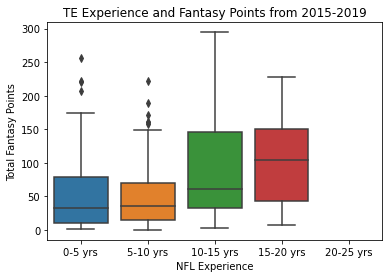

The p value from the ANOVA test comparing Experience to Fantasy Points for the tight end position is 1.5732895768458249e-12.
This tells us there is not a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,358.000000,358.000000,358.000000
mean,8.013966,536.116760,62.869274
std,3.349372,303.356988,61.840922
min,3.000000,25.200000,-0.200000
25%,5.000000,385.400000,15.650000
50%,8.000000,515.000000,39.950000
75%,11.000000,656.050000,92.450000
max,19.000000,2021.000000,294.600000


In [43]:
te = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=te_data.dropna()).set_title('TE Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_TE.png')
plt.show()
group1 = te_data[te_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = te_data[te_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = te_data[te_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = te_data[te_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
te = sts.f_oneway(group1, group2, group3, group4)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the tight end position is {te[1]}.')
print(f'This tells us there is not a relationship between Experience and Fantasy Points.')
te_data[['Experience','ADP','FantasyPoints']].dropna().describe()